In [1]:
import pandas as pd

# Loading the pickles back into their original variable names
monoamine_plot_df = pd.read_pickle('../processed/monoamine_connectome.pkl')
npp_short_plot_df  = pd.read_pickle('../processed/NPP_connectome_short_range.pkl')
npp_mid_plot_df    = pd.read_pickle('../processed/NPP_connectome_mid_range.pkl')
npp_long_plot_df   = pd.read_pickle('../processed/NPP_connectome_long_range.pkl')

print("All connectome DataFrames loaded successfully.")

All connectome DataFrames loaded successfully.


## Examine connectome properties

In [18]:
import pub_utils as pu

df = monoamine_plot_df  # Example connectome
# df = npp_short_plot_df  
nim = pu.NeuronInteraction(df)     

# Check the health and density of your network
print(f"--- Connectome Profile ---")
stats = nim.summary_stats()
print(f"Network Size: {stats['size']} neurons")
print(f"Network Sparsity: {stats['sparsity']:.2%}")
print(f"Maximum Node Degree: {stats['max_weight']} unique ligand-receptor connections")
print(f"Reciprocal Connections: {stats['reciprocal_count']} pairs of unique ligand-receptor connections")
reciprocal_pairs = nim.get_reciprocal_pairs()
for n1, n2, v12, v21 in reciprocal_pairs:
    print(f"    {n1} - {n2}")

--- Connectome Profile ---
Network Size: 302 neurons
Network Sparsity: 96.84%
Maximum Node Degree: 3 unique ligand-receptor connections
Reciprocal Connections: 57 pairs of unique ligand-receptor connections
    ADFL - ADFR
    ADFL - HSNL
    ADFL - HSNR
    ADFL - I5
    ADFL - NSML
    ADFL - NSMR
    ADFL - RIML
    ADFL - RIMR
    ADFR - HSNL
    ADFR - HSNR
    ADFR - I5
    ADFR - NSML
    ADFR - NSMR
    ADFR - RIML
    ADFR - RIMR
    CEPDL - CEPDR
    CEPDL - CEPVL
    CEPDL - CEPVR
    CEPDL - PDEL
    CEPDL - PDER
    CEPDL - RIML
    CEPDL - RIMR
    CEPDR - CEPVL
    CEPDR - CEPVR
    CEPDR - PDEL
    CEPDR - PDER
    CEPDR - RIML
    CEPDR - RIMR
    CEPVL - CEPVR
    CEPVL - PDEL
    CEPVL - PDER
    CEPVL - RIML
    CEPVL - RIMR
    CEPVR - PDEL
    CEPVR - PDER
    CEPVR - RIML
    CEPVR - RIMR
    HSNL - HSNR
    HSNL - I5
    HSNL - NSML
    HSNL - NSMR
    HSNR - I5
    HSNR - NSML
    HSNR - NSMR
    I5 - NSML
    I5 - NSMR
    NSML - NSMR
    NSML - RIML
    NSML 


Network Statistics:
  Nodes: 17
  Edges: 114


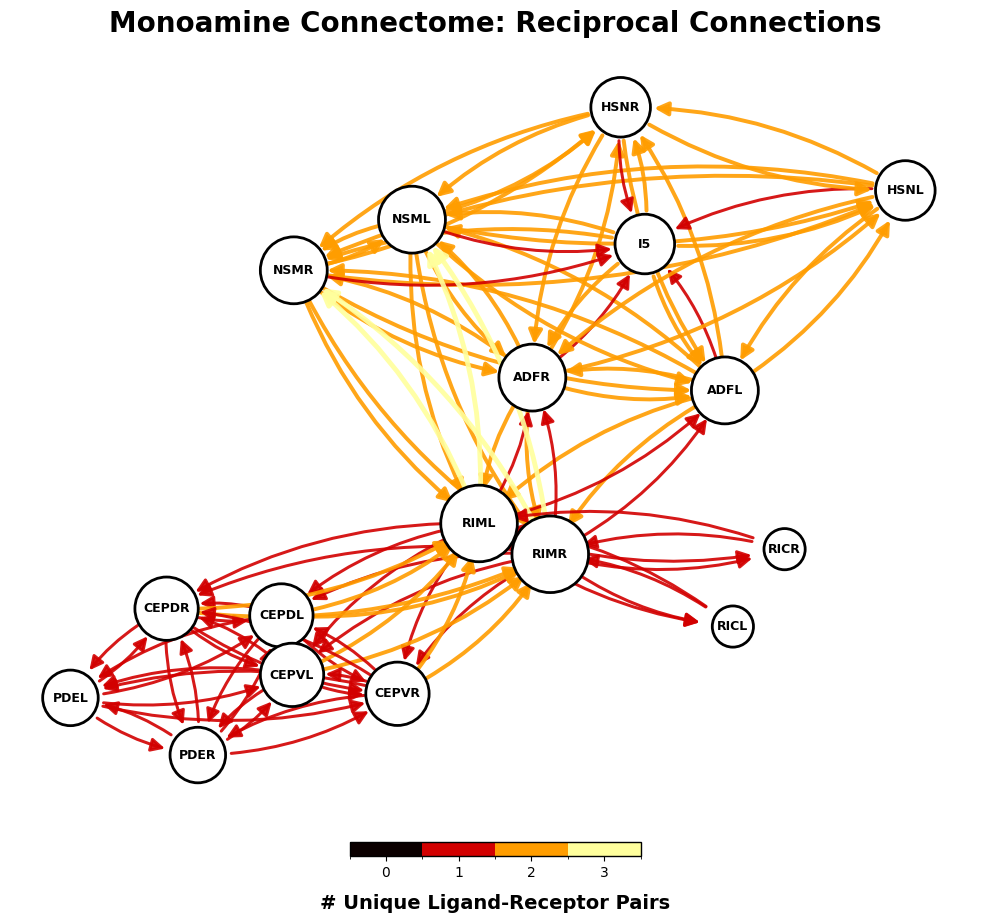

In [19]:
connectome = 'Monoamine Connectome'
# connectome = 'NPP Short-Range Connectome'

fig, ax, G = pu.plot_reciprocal_network(reciprocal_pairs, title=f'{connectome}: Reciprocal Connections')
# fig.savefig('reciprocal_network.png', dpi=150, bbox_inches='tight')

# Print some network statistics
print(f"\nNetwork Statistics:")
print(f"  Nodes: {G.number_of_nodes()}")
print(f"  Edges: {G.number_of_edges()}")

## Examine single neurons

In [20]:
neuron = 'NSML'           # Example neuron
# neuron = 'AVKL'

# Analyze a specific neuron
av_profile = nim.analyze_neuron(neuron)

print(f"--- Profile for {av_profile['neuron']} inputs ---")
# print(f"Input Sources: {av_profile['input_partners']}")
print(f"Top Sources: {nim.top_sources(neuron, n=8)}")

print(f"\n--- Profile for {av_profile['neuron']} outputs ---")
# print(f"Output Recipients: {av_profile['output_partners']}")
print(f"Top Recipients: {nim.top_recipients(neuron, n=8)}")

print(f"\n--- Inout/Output Ratio for {av_profile['neuron']} ---")
print(f"In-degree: {av_profile['summary_stats']['in_degree']} unique ligand-receptor connections")
print(f"Out-degree: {av_profile['summary_stats']['out_degree']} unique ligand-receptor connections")
print(f"In/Out Ratio: {av_profile['summary_stats']['in_degree']/av_profile['summary_stats']['out_degree']:.2f}")

--- Profile for NSML inputs ---
Top Sources: Source
RIML    3
RIMR    3
ADFL    2
ADFR    2
HSNL    2
HSNR    2
I5      2
NSML    2
Name: NSML, dtype: int64

--- Profile for NSML outputs ---
Top Recipients: Recipient
AIZL    3
AIZR    3
RIPL    3
RIPR    3
RIR     3
ADFL    2
ADFR    2
AIBL    2
Name: NSML, dtype: int64

--- Inout/Output Ratio for NSML ---
In-degree: 9 unique ligand-receptor connections
Out-degree: 133 unique ligand-receptor connections
In/Out Ratio: 0.07


## Examine source-recipient pairs

In [23]:
source = 'NSML'
recipient = 'AVAL'
path = nim.get_shortest_path(source, recipient)
print(f"Shortest path in {connectome} from {source} to {recipient}:")
if path is not None:
    print(" → ".join(path))
else:
    print("No path found.")

Shortest path in Monoamine Connectome from NSML to AVAL:
NSML → RIML → CEPDL → AVAL


In [24]:
source = 'AVAL'
recipient = 'RIBL'
path = nim.get_shortest_path(source, recipient)
print(f"Shortest path in {connectome} from {source} to {recipient}:")
if path is not None:
    print(" → ".join(path))
else:
    print("No path found.")

Shortest path in Monoamine Connectome from AVAL to RIBL:
No path found.


In [ ]:
# def analyze_pair(self, source: str, recipient: str) -> Dict:
#     """Analyzes interaction and structural similarity between two neurons."""
#     path = self.get_shortest_path(source, recipient)
    
#     # Shared context (Structural Similiarity)
#     inputs_a = set(self.get_neighbors(source, 'incoming'))
#     inputs_b = set(self.get_neighbors(recipient, 'incoming'))
#     outputs_a = set(self.get_neighbors(source, 'outgoing'))
#     outputs_b = set(self.get_neighbors(recipient, 'outgoing'))
    
#     shared_in = inputs_a.intersection(inputs_b)
#     shared_out = outputs_a.intersection(outputs_b)
    
#     # Jaccard similarity for outputs
#     union_out = outputs_a.union(outputs_b)
#     sim_score = len(shared_out) / len(union_out) if union_out else 0.0

#     return {
#         "pathway": f"{source} -> {recipient}",
#         "direct_strength": self.get_value(source, recipient),
#         "topology": {
#             "reachable": path is not None,
#             "hops": len(path) - 1 if path else -1,
#             "path": path
#         },
#         "structural_overlap": {
#             "shared_inputs": list(shared_in),
#             "shared_outputs": list(shared_out),
#             "similarity_index": round(sim_score, 3)
#         }
#     }